# Segmenting and Clustering in Toronto

## Submission Part 1 - Cleaning and Scraping the Dataframe

Import libraries and packages needed for this part

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

Using the BeautifulSoup library, the values are extracted from the Wikipage, and appended into the respective columns of A,B,C

In [2]:
url = "https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&direction=prev&oldid=926287641"
postal_page = urllib.request.urlopen(url)
postal_soup = BeautifulSoup(postal_page, "lxml")
postal_table=postal_soup.find('table', class_="wikitable sortable")

A=[]
B=[]
C=[]

for row in postal_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

Renaming the columns and providing headers for the df

In [3]:
df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough']=B
df['Neighborhood']=C
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Using the 'drop' function to remove 'Not assigned' Boroughs from the dataset

In [4]:
df.drop(df[df['Borough']=="Not assigned"].index, inplace=True)
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


Groupby and join to group by postal code and borought while 'joining' the Neighborhoods

In [5]:
df = df.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(", ".join).reset_index()
df

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood\n, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae\n
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park\n, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West\n"
9,M1N,Scarborough,"Birch Cliff, Cliffside West\n"


The output above, kept returning redundant new lines (\n) after some of the Neighborhoods had been joined. This is removed by the 'replace' function 

In [6]:
#Got to remove the new lines which has been transfered from the join 
df = df.replace("\\n", '',regex=True)
df

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


Now to check if there are any Neighborhoods with a 'Not assigned' value

In [7]:
#Check where it has been found
df.loc[df['Neighborhood'] == "Not assigned"]

,PostalCode,Borough,Neighborhood
85,M7A,Queen's Park,Not assigned


Utilizing Numpys where if_then function

In [8]:
#Using Numpy to replace Neighborhoods with 'Not assigned' values to the Borough value instead
df['Neighborhood'] = np.where(df['Neighborhood'] == "Not assigned", df['Borough'], df['Neighborhood'])

In [9]:
#Checks that the 'Not assigned' value is no longer present in the 'Neighborhood' column
df.loc[df['Neighborhood'] == "Not assigned"]

,PostalCode,Borough,Neighborhood


In [10]:
df.shape

(103, 3)

## Submission Part 2 - Geographical data

I could not get the geocoder to work - so I have downloaded the CSV file instead, and procceded with this.

In [11]:
geo_data = pd.read_csv('http://cocl.us/Geospatial_data')


Below i decided to change the name of the Postal Code in the csv file to "PostalCode" to match the entry from the df created in Part 1 of the submission

In [12]:
geo_data.columns = ['PostalCode', 'Lattitude', 'Longitude']
geo_data.head()

,PostalCode,Lattitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Using the Merge function of the pandas library, to merge the two dataframes, based on the column name 'PostalCode', hence the renaming from earlier

In [13]:
df_geo = pd.merge(df, geo_data, on='PostalCode')
df_geo

,PostalCode,Borough,Neighborhood,Lattitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Submission Part 3 - Explore and Cluster Neighborhoods

Start with importing libraries not already loaded from Part 1 and 2

In [15]:
import json
!conda install -c conda-forge geopy --yes
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Completed')

Solving environment: \ Solving environment: - Completed


Using the str.contains method to find all boroughs which contain the word "Toronto"

In [16]:
toronto_data = df_geo[df_geo['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Lattitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


Now I will create a map similar to the one created in the New York lab for Manhattan

In [17]:
init_lat = 43.651070
init_long = -79.347015

map_toronto = folium.Map(location=[init_lat, init_long], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Lattitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [18]:
# The code was removed by Watson Studio for sharing.

Now following the NY-lab, initally get the first neighborhood in the dataframe and explore it

In [19]:
toronto_data.loc[0, 'Neighborhood']

neighborhood_latitude = toronto_data.loc[0, 'Lattitude']
neighborhood_longitude = toronto_data.loc[0, 'Longitude']
neighborhood_name = toronto_data.loc[0, 'Neighborhood']

print('For {}, the latitude is {} and longitude {}'.format(neighborhood_name, neighborhood_latitude, neighborhood_longitude))

For The Beaches, the latitude is 43.67635739999999 and longitude -79.2930312


Now getting the top 100 venues within an radius of 500 meters of The Beaches

In [20]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighborhood_latitude,
    neighborhood_longitude,
    radius,
    LIMIT)

In [21]:
import requests
thebeaches_results = requests.get(url).json()
thebeaches_results

{'meta': {'code': 200, 'requestId': '5ec44688b1cac0001b6bf423'},
 'response': {'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.680857404499996,
    'lng': -79.28682091449052},
   'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.67682094413784,
          'lng': -79.29394208780985}],
        'distanc

Now structuring the data to a pandas data frame using the 'get_category_type' function from the lab

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = thebeaches_results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


Further exploration of all neighborhoods, from boroughs with the word "Toronto". Defining the 'getNearbyVenues' function - similar to the lab

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Lattitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

In [28]:
print(toronto_venues.shape)
toronto_venues.head()

(1564, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


Checking the number of venues per neighborhood, utilizing the 'groupby' and 'count' functions (Similar to Part 1 when we had to groupby boroughs)

In [29]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",93,93,93,93,93,93
Berczy Park,55,55,55,55,55,55
"Brockton, Exhibition Place, Parkdale Village",23,23,23,23,23,23
Business Reply Mail Processing Centre 969 Eastern,18,18,18,18,18,18
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",17,17,17,17,17,17
"Cabbagetown, St. James Town",41,41,41,41,41,41
Central Bay Street,63,63,63,63,63,63
"Chinatown, Grange Park, Kensington Market",55,55,55,55,55,55
Christie,17,17,17,17,17,17


In [30]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 233 uniques categories.


Analyzing each neighborhood

### Doing this one-hot encoding part, i noticed that one of the Venue Categories was actually 'Neighborhood' hence, when I tried to add a column named 'Neighborhood' in toronto_superhot - it was already present! Hence I changed the name for toronto_superhot[Neighborhood] to [Neigborhoodd]

In [31]:
# one hot encoding
toronto_superhot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_superhot['Neighborhoodd'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_superhot.columns[-1]] + list(toronto_superhot.columns[:-1])
toronto_superhot = toronto_superhot[fixed_columns]

toronto_superhot.head()

,Neighborhoodd,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
toronto_superhot.shape

(1564, 234)

In [33]:
toronto_grouped = toronto_superhot.groupby('Neighborhoodd').mean().reset_index()
toronto_grouped

,Neighborhoodd,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021505,0.000000,...,0.00000,0.00,0.010753,0.000000,0.000000,0.000000,0.000000,0.000000,0.010753,0.000000
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.058824,0.058824,0.058824,0.117647,0.117647,0.117647,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Cabbagetown, St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.015873,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000,0.015873
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.036364,0.000000,0.000000,0.054545,0.018182,0.000000,0.000000,0.000000
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Church and Wellesley,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013514,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.013514,0.000000,0.027027


In [34]:
toronto_grouped.shape

(38, 234)

Now printing the top 5 most common venues for each neighborhood

In [85]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhoodd']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhoodd'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
            venue  freq
0     Coffee Shop  0.10
1            Café  0.05
2      Restaurant  0.04
3  Clothing Store  0.03
4           Hotel  0.03


----Berczy Park----
          venue  freq
0   Coffee Shop  0.07
1  Cocktail Bar  0.05
2   Cheese Shop  0.04
3        Bakery  0.04
4    Restaurant  0.04


----Brockton, Exhibition Place, Parkdale Village----
                  venue  freq
0                  Café  0.13
1        Breakfast Spot  0.09
2           Coffee Shop  0.09
3  Gym / Fitness Center  0.04
4             Nightclub  0.04


----Business Reply Mail Processing Centre 969 Eastern----
                  venue  freq
0    Light Rail Station  0.11
1  Gym / Fitness Center  0.06
2               Brewery  0.06
3                   Spa  0.06
4            Smoke Shop  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0    Airport Lounge  0.12
1   Airport Service  0.12

In [86]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [87]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhoodd']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Restaurant,Thai Restaurant,Hotel,Gym,Deli / Bodega,Clothing Store,Salad Place,Seafood Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Cheese Shop,Café,Restaurant,Jazz Club,Fish Market
2,"Brockton, Exhibition Place, Parkdale Village",Café,Breakfast Spot,Coffee Shop,Gym / Fitness Center,Bakery,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Spa,Auto Workshop,Brewery,Burrito Place,Comic Shop,Farmers Market,Fast Food Restaurant,Garden Center
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Boat or Ferry,Harbor / Marina,Rental Car Location,Plane,Coffee Shop,Boutique,Bar


Now I have created a dataframe containing the 10 most frequent venues for each Neighborhood in Toronto.

Next step is to Cluster the Neighborhoods. Using the Elbow Method and evaluating multiple number of clusters at once, to decide the optimal number of clusters for the Toronto_grouped dataset

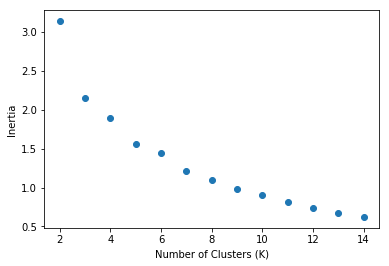

Based on the visual assessment I will continue with 7 clusters


array([0, 0, 0, 0, 0, 0, 0, 0, 5, 0], dtype=int32)

In [88]:
import matplotlib.pyplot as plt

toronto_grouped_clustering = toronto_grouped.drop('Neighborhoodd', 1)
N =15
inertia=[]

for k in range(2,N):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
        inertia.append(kmeans.inertia_)
        

        
plt.scatter(range(2,N),inertia)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters (K)')
plt.show()
        

print('Based on the visual assessment I will continue with 7 clusters')
# run k-means clustering##
kclusters=7

kmeans_t = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_t.labels_[0:10] 

In [89]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_t.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Lattitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Trail,Neighborhood,Health Food Store,Pub,Yoga Studio,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Restaurant,Furniture / Home Store,Yoga Studio,Spa,Indian Restaurant,Pub
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,0,Sandwich Place,Park,Fast Food Restaurant,Board Shop,Food & Drink Shop,Burrito Place,Restaurant,Italian Restaurant,Fish & Chips Shop,Intersection
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,American Restaurant,Bakery,Brewery,Gastropub,Yoga Studio,Fish Market,Pet Store,Park
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,6,Bus Line,Park,Swim School,Yoga Studio,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop


In [90]:
# create map
map_clusters = folium.Map(location=[init_lat, init_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Lattitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters